In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
data = pd.read_csv("rsem.merged.gene_tpm.tsv", sep='\t')  


In [3]:
ern_genes_df = pd.read_csv("../ERN_genes_tables/ERN_gene_ensemble_uniprot.csv")  

In [4]:
ERN_genes = ern_genes_df['ensemble']

In [5]:
#dictionary of all ensemble names to uniprot names
ERN_dict = pd.Series(ern_genes_df.uniprot.values, index=ern_genes_df.ensemble).to_dict()

In [6]:
selected_data = data[data['gene_id'].isin(ERN_genes)]
print(selected_data.shape)

(318, 23)


In [7]:
#selecting oinly ERGs
selected_data['gene_id'] = selected_data['gene_id'].map(ERN_dict)

/var/folders/g2/5nkmx9rd24x5y578db79brcr0000gq/T/ipykernel_25597/2350559710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['gene_id'] = selected_data['gene_id'].map(ERN_dict)


In [8]:
selected_data

,gene_id,transcript_id(s),HBC3-T1_Rep1,HBC3-T1_Rep2,HBC3-T1_Rep3,HBC3-T2_Rep1,HBC3-T2_Rep2,HBC3-T2_Rep3,HBC3-T3_Rep1,HBC3-T3_Rep2,...,HBC3-T4_Rep2,HBC3-T4_Rep3,HBC3_Rep2,HBC3_Rep3,HBC3-P_Rep1,HBC3-P_Rep2,HBC3-P_Rep3,HBC3-KP_Rep1,HBC3-KP_Rep2,HBC3-KP_Rep3
52,KDM1A,"ENST00000356634,ENST00000400181,ENST0000046586...",81.33,82.04,80.83,70.77,71.72,72.70,76.91,74.50,...,70.34,69.46,73.45,73.26,80.64,76.76,77.45,75.45,75.55,73.86
91,MSL3,"ENST00000312196,ENST00000337339,ENST0000036167...",19.31,20.81,23.08,26.79,21.51,21.38,21.33,20.75,...,20.00,19.01,21.61,21.38,23.20,20.33,23.89,22.46,24.17,19.14
92,CREBBP,"ENST00000262367,ENST00000382070,ENST0000057093...",18.29,13.20,15.96,16.77,15.81,13.13,15.45,14.38,...,19.76,16.24,13.36,11.83,12.85,12.59,13.98,14.63,15.65,13.20
100,KMT2E,"ENST00000257745,ENST00000311117,ENST0000033488...",19.27,21.96,20.00,20.05,23.24,21.02,20.37,18.65,...,20.60,20.70,29.64,28.05,28.02,25.61,27.25,18.75,23.72,21.56
136,KDM7A,"ENST00000397560,ENST00000472616,ENST00000478996",4.93,6.44,6.31,14.18,10.03,8.96,6.01,6.76,...,7.43,6.14,3.94,2.57,2.31,2.26,2.53,5.58,6.70,4.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51863,KMT2B,"ENST00000420124,ENST00000585476,ENST0000058630...",10.58,9.64,10.08,11.20,10.76,9.11,11.61,9.70,...,12.98,12.07,9.34,7.45,10.73,10.29,10.74,9.94,11.92,9.06
52876,H2AFB1,ENST00000620016,0.00,0.09,0.00,0.18,0.00,0.10,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00
53839,UHRF1,"ENST00000612630,ENST00000613817,ENST0000061588...",49.67,47.32,49.52,29.13,32.03,31.71,43.33,46.07,...,47.58,46.97,28.67,30.01,37.64,41.71,39.56,41.97,40.78,39.70
53943,TADA2A,"ENST00000610834,ENST00000612272,ENST0000061411...",14.66,12.11,12.11,10.02,11.71,11.30,11.89,12.01,...,12.72,12.58,9.65,9.13,13.16,12.19,13.15,12.95,12.30,13.70


In [9]:
 selected_data.columns.values.tolist()

['gene_id',
 'transcript_id(s)',
 'HBC3-T1_Rep1',
 'HBC3-T1_Rep2',
 'HBC3-T1_Rep3',
 'HBC3-T2_Rep1',
 'HBC3-T2_Rep2',
 'HBC3-T2_Rep3',
 'HBC3-T3_Rep1',
 'HBC3-T3_Rep2',
 'HBC3-T3_Rep3',
 'HBC3-T4_Rep1',
 'HBC3_Rep1',
 'HBC3-T4_Rep2',
 'HBC3-T4_Rep3',
 'HBC3_Rep2',
 'HBC3_Rep3',
 'HBC3-P_Rep1',
 'HBC3-P_Rep2',
 'HBC3-P_Rep3',
 'HBC3-KP_Rep1',
 'HBC3-KP_Rep2',
 'HBC3-KP_Rep3']

In [10]:
#reindexing columns (just for 
selected_data = selected_data.reindex(columns=['gene_id',  
                         'HBC3_Rep1','HBC3_Rep2','HBC3_Rep3',
                         'HBC3-T1_Rep1', 'HBC3-T1_Rep2','HBC3-T1_Rep3',
                         'HBC3-T2_Rep1', 'HBC3-T2_Rep2', 'HBC3-T2_Rep3',
                         'HBC3-T3_Rep1', 'HBC3-T3_Rep2', 'HBC3-T3_Rep3',
                         'HBC3-T4_Rep1', 'HBC3-T4_Rep2','HBC3-T4_Rep3', 
                         'HBC3-P_Rep1', 'HBC3-P_Rep2', 'HBC3-P_Rep3',
                         'HBC3-KP_Rep1', 'HBC3-KP_Rep2','HBC3-KP_Rep3'])

**Understanding the consistency between samples in one experiment**

In [11]:
HBC3_basic = selected_data[["gene_id", "HBC3_Rep1", "HBC3_Rep2", "HBC3_Rep3"]]
HBC3_basic

,gene_id,HBC3_Rep1,HBC3_Rep2,HBC3_Rep3
52,KDM1A,73.68,73.45,73.26
91,MSL3,18.17,21.61,21.38
92,CREBBP,12.29,13.36,11.83
100,KMT2E,28.73,29.64,28.05
136,KDM7A,2.94,3.94,2.57
...,...,...,...,...
51863,KMT2B,9.39,9.34,7.45
52876,H2AFB1,0.00,0.00,0.00
53839,UHRF1,26.60,28.67,30.01
53943,TADA2A,8.48,9.65,9.13


In [12]:
#melting the df for better easier plot creation
HBC3_basic = HBC3_basic.melt(id_vars='gene_id', var_name='replicate', value_name='expression')
HBC3_basic

,gene_id,replicate,expression
0,KDM1A,HBC3_Rep1,73.68
1,MSL3,HBC3_Rep1,18.17
2,CREBBP,HBC3_Rep1,12.29
3,KMT2E,HBC3_Rep1,28.73
4,KDM7A,HBC3_Rep1,2.94
...,...,...,...
949,KMT2B,HBC3_Rep3,7.45
950,H2AFB1,HBC3_Rep3,0.00
951,UHRF1,HBC3_Rep3,30.01
952,TADA2A,HBC3_Rep3,9.13


/Users/yunonapospelova/miniconda3/envs/ds/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


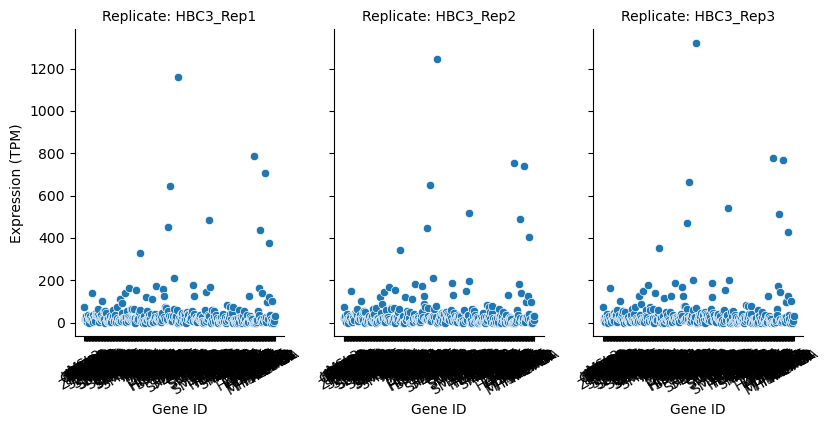

In [13]:
g = sns.FacetGrid(HBC3_basic, col="replicate", height=4, aspect=.7)
g = g.map_dataframe(sns.scatterplot, x="gene_id", y="expression")
g.set_axis_labels("Gene ID", "Expression (TPM)")
g.set_titles("Replicate: {col_name}")
g.set_xticklabels(rotation=30)

plt.show()

In [14]:
#correlation heatmap 
correlation_matrix = HBC3_basic.pivot(index='gene_id', columns='replicate', values='expression').corr()


In [15]:
correlation_matrix

replicate,HBC3_Rep1,HBC3_Rep2,HBC3_Rep3
replicate,,,
HBC3_Rep1,1.000000,0.998653,0.997903
HBC3_Rep2,0.998653,1.000000,0.999484
HBC3_Rep3,0.997903,0.999484,1.000000


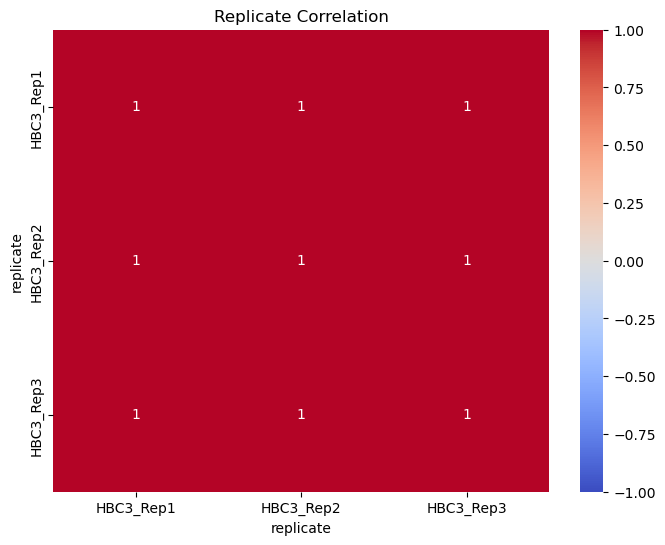

In [16]:
#correlation plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Replicate Correlation')
plt.show()

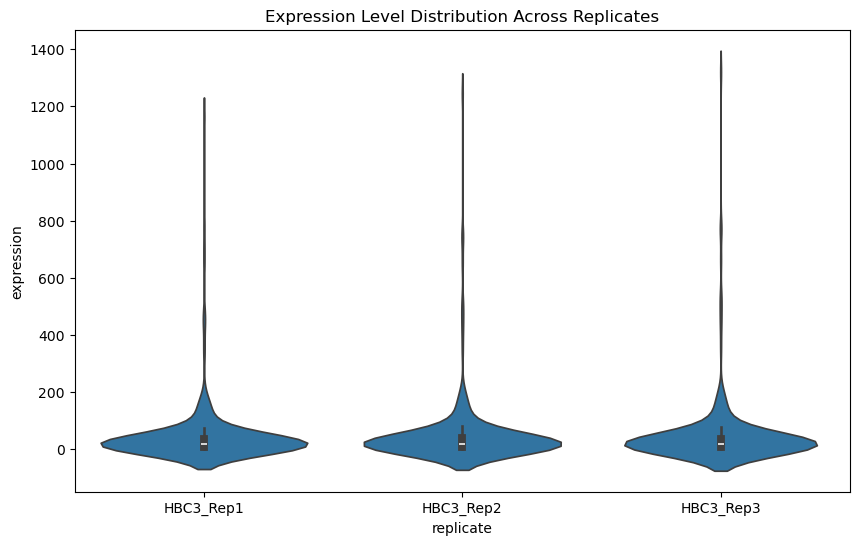

In [17]:
#violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='replicate', y='expression', data=HBC3_basic)
plt.title('Expression Level Distribution Across Replicates')
plt.show()

**Comparison of overall ERG expression level across all samples**

In [18]:
selected_melted_data = selected_data.melt(id_vars='gene_id', 
                                 var_name='experiment_replicate', 
                                 value_name='expression')


In [19]:
selected_melted_data['tissue'] = selected_melted_data['experiment_replicate'].apply(lambda x: x.split('_')[0])
selected_melted_data['replicate'] = selected_melted_data['experiment_replicate'].apply(lambda x: x.split('_')[-1])

In [20]:
selected_melted_data

,gene_id,experiment_replicate,expression,tissue,replicate
0,KDM1A,HBC3_Rep1,73.68,HBC3,Rep1
1,MSL3,HBC3_Rep1,18.17,HBC3,Rep1
2,CREBBP,HBC3_Rep1,12.29,HBC3,Rep1
3,KMT2E,HBC3_Rep1,28.73,HBC3,Rep1
4,KDM7A,HBC3_Rep1,2.94,HBC3,Rep1
...,...,...,...,...,...
6673,KMT2B,HBC3-KP_Rep3,9.06,HBC3-KP,Rep3
6674,H2AFB1,HBC3-KP_Rep3,0.00,HBC3-KP,Rep3
6675,UHRF1,HBC3-KP_Rep3,39.70,HBC3-KP,Rep3
6676,TADA2A,HBC3-KP_Rep3,13.70,HBC3-KP,Rep3


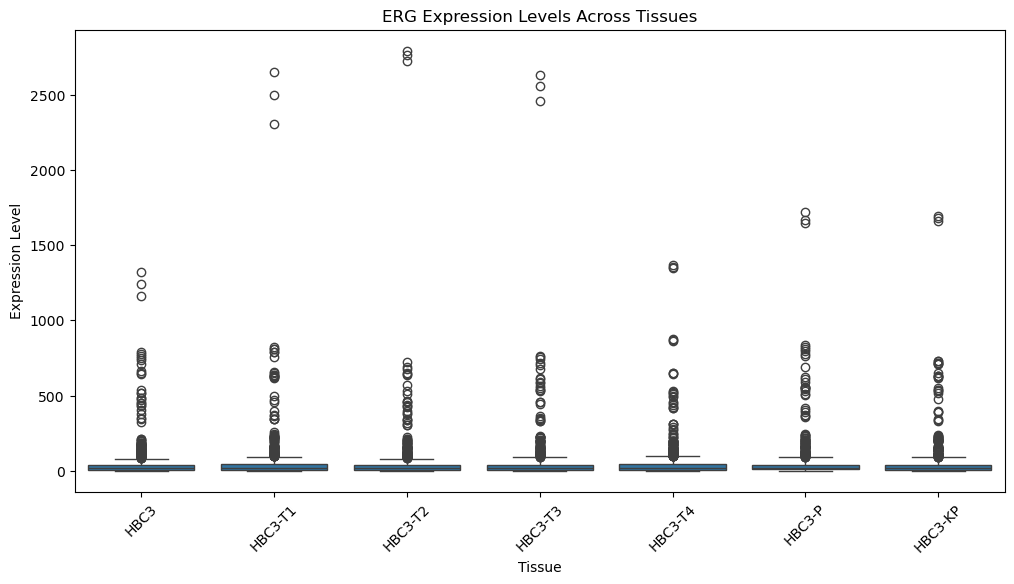

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='tissue', y='expression', data=selected_melted_data)
plt.title('ERG Expression Levels Across Tissues')
plt.xlabel('Tissue')
plt.ylabel('Expression Level')
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


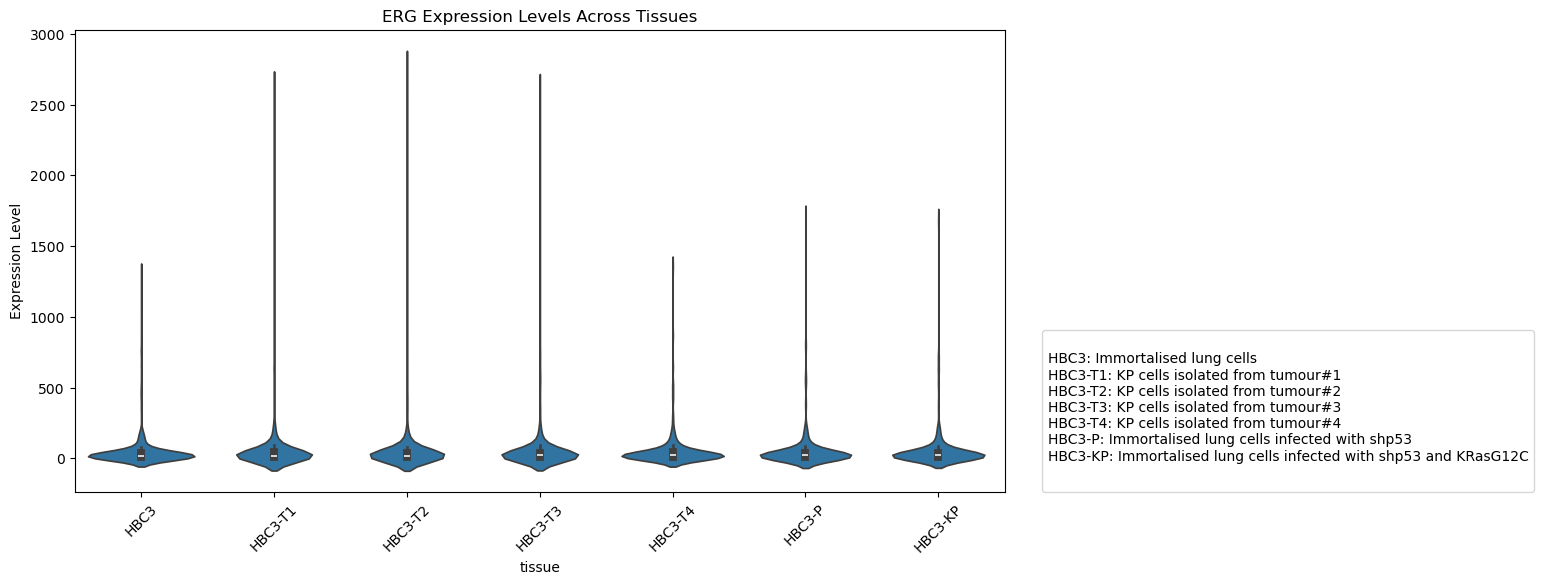

In [42]:
#violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='tissue', y='expression', data=selected_melted_data)
plt.title('ERG Expression Levels Across Tissues')
plt.ylabel('Expression Level')
plt.xticks(rotation=45)

legend_text = """
HBC3: Immortalised lung cells
HBC3-T1: KP cells isolated from tumour#1
HBC3-T2: KP cells isolated from tumour#2
HBC3-T3: KP cells isolated from tumour#3
HBC3-T4: KP cells isolated from tumour#4
HBC3-P: Immortalised lung cells infected with shp53
HBC3-KP: Immortalised lung cells infected with shp53 and KRasG12C
"""
plt.legend(bbox_to_anchor=(1.04, 0), loc="lower left", borderaxespad=0, title = legend_text)


# Show the plot

plt.show()

In [24]:
#anova test - is there a significant difference in overall gene expression level across different 
model = ols('expression ~ C(tissue)', data=selected_melted_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq      df         F    PR(>F)
C(tissue)  3.148738e+04     6.0  0.248461  0.960087
Residual   1.409021e+08  6671.0       NaN       NaN


**Are levels for individual genes conserved across tissues/normal cell lines?**

In [44]:
#counting median for each gene and standard deviation
gene_stats = selected_data.set_index('gene_id').T.describe().T[['mean', 'std']]
print(gene_stats.head())

              mean       std
gene_id                     
KDM1A    75.198095  3.893503
MSL3     21.342381  2.097741
CREBBP   14.829048  2.049902
KMT2E    22.737619  3.650852
KDM7A     5.971905  2.881355


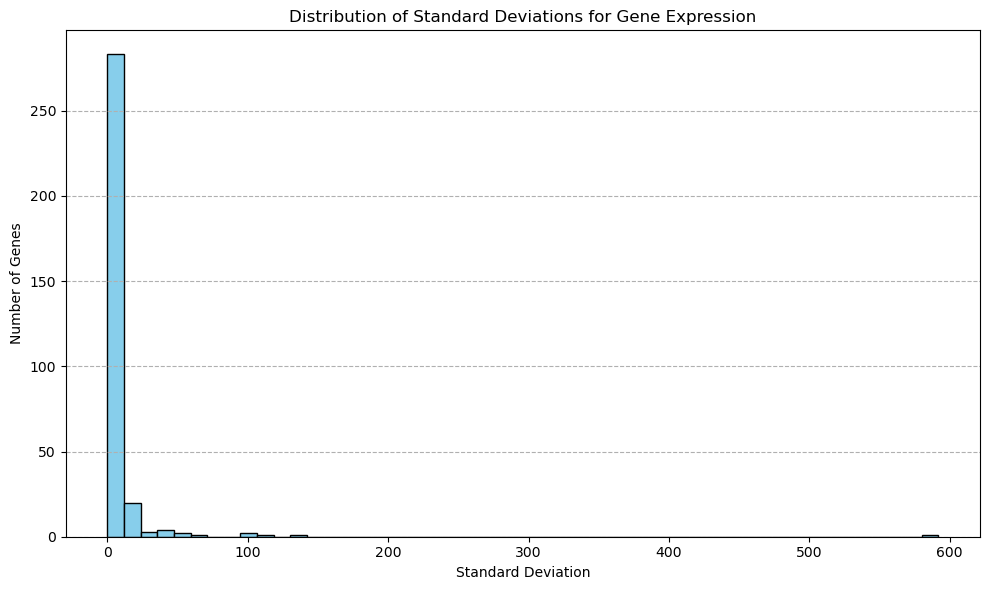

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(gene_stats['std'], bins=50, edgecolor='black', color='skyblue')
plt.title('Distribution of Standard Deviations for Gene Expression')
plt.xlabel('Standard Deviation')
plt.ylabel('Number of Genes')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


Genes with high standart deviation are highly variable while a low standard deviation indicates consistent expression across tissues. 

In [48]:
#plot top 10 genes with highes std dev
N = 10 
top_variable_genes = gene_stats.nlargest(N, 'std').index.tolist()
high_std_data = selected_data[selected_data['gene_id'].isin(top_variable_genes)]

In [53]:
#here is the statistics for top 10 genes
print(gene_stats.loc[top_variable_genes])

                mean         std
gene_id                         
HMGA1    1964.470000  591.934224
HMGN2     601.872857  141.110216
NAP1L1    643.980000  106.832372
H3F3B     721.306190   98.866346
H2AFZ     649.258095   94.719648
HMGB1     539.220476   63.733056
HMGA2     131.740476   58.154351
PRMT5     199.717619   48.501096
H1F0      147.922857   46.046497
HMGN1     363.892857   44.555304


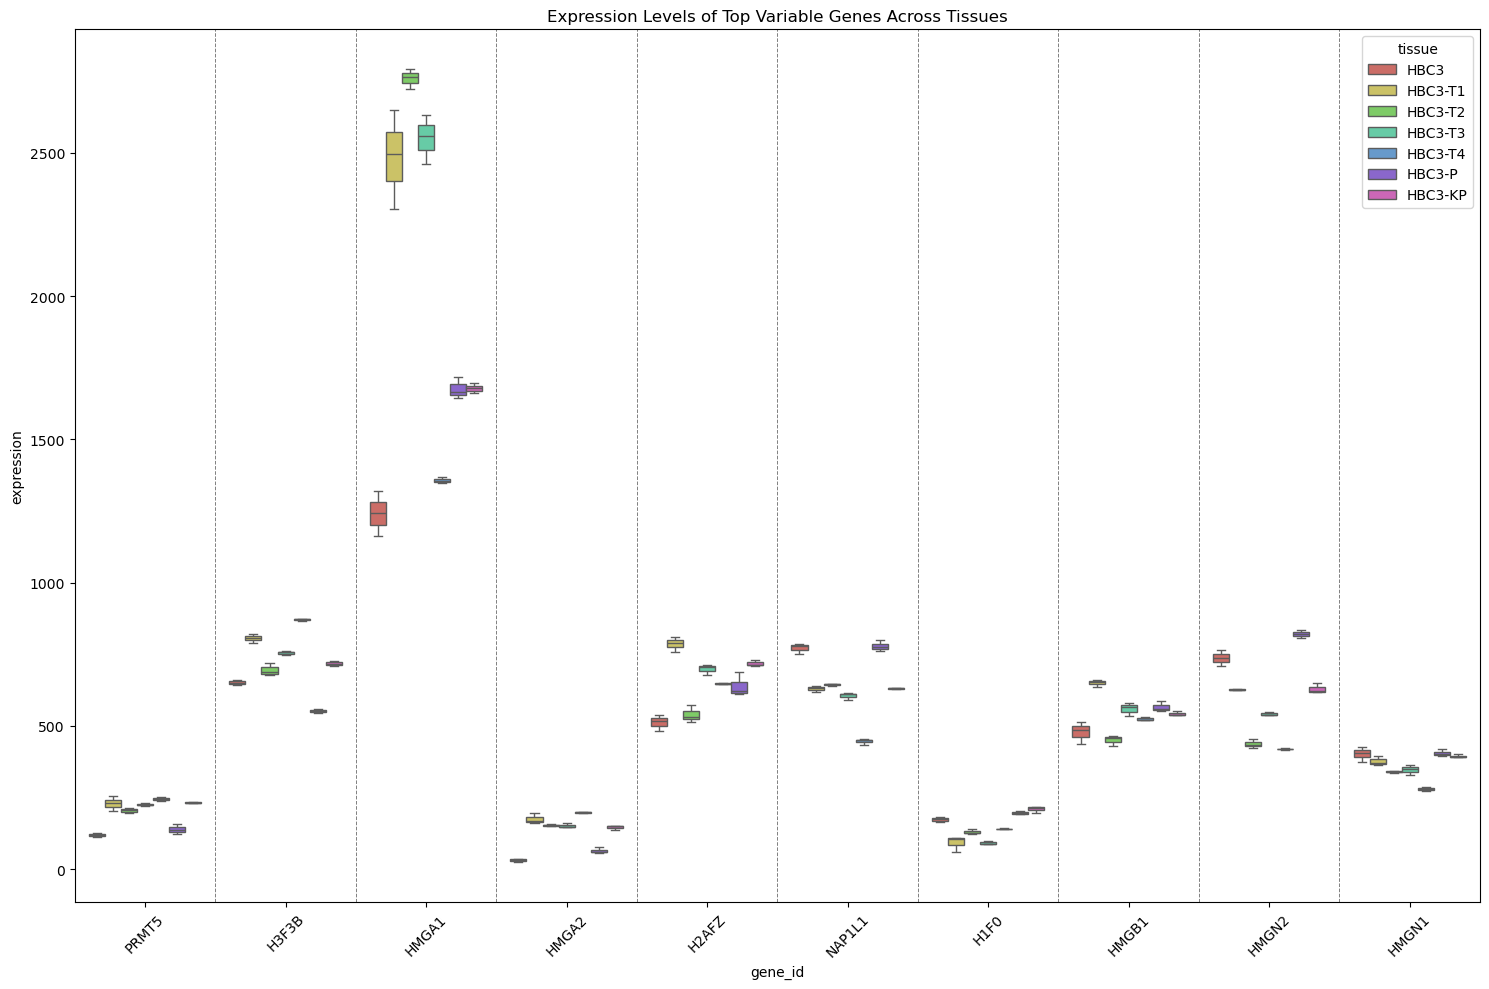

In [60]:
melted_filtered_data = high_std_data.melt(id_vars=['gene_id'], 
                                          var_name='experiment_replicate', 
                                          value_name='expression')

# Extract tissue type
melted_filtered_data['tissue'] = melted_filtered_data['experiment_replicate'].apply(lambda x: x.split('_')[0])

unique_tissues = melted_filtered_data['tissue'].unique()
palette = sns.color_palette("hls", len(unique_tissues))

plt.figure(figsize=(15, 10))
sns.boxplot(x='gene_id', y='expression', hue='tissue', data=melted_filtered_data, palette=palette)



# Add vertical lines between each gene
gene_ids = melted_filtered_data['gene_id'].unique()
for i in range(len(gene_ids) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.7)

plt.title('Expression Levels of Top Variable Genes Across Tissues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

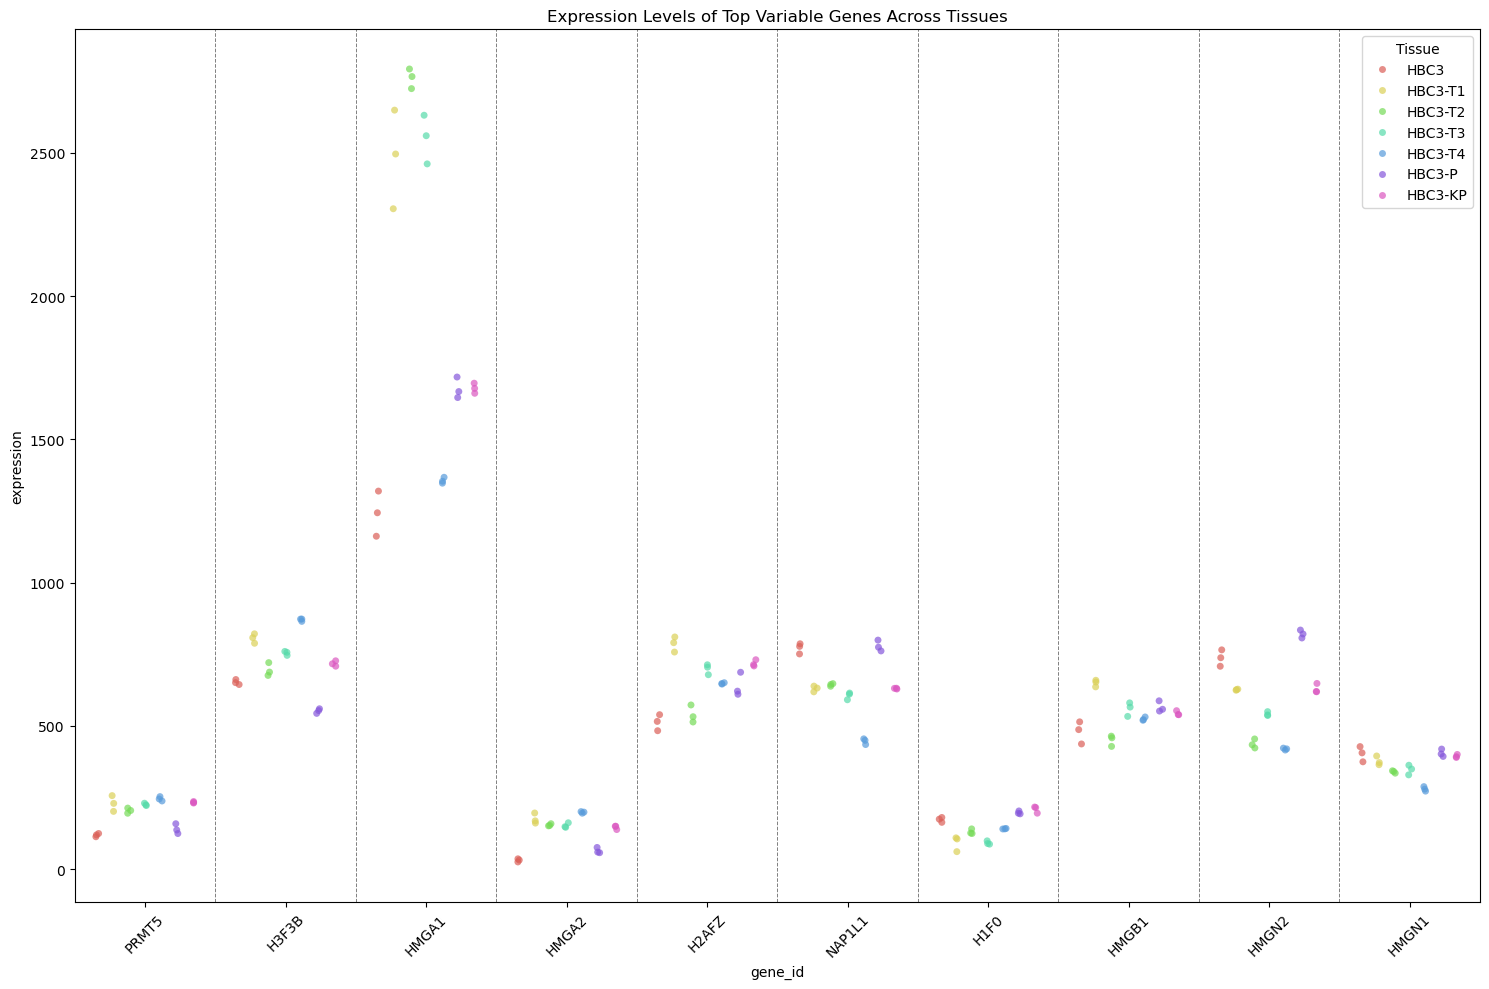

In [61]:
plt.figure(figsize=(15, 10))

# Stripplot to plot dots instead of boxes
sns.stripplot(x='gene_id', y='expression', hue='tissue', data=melted_filtered_data, palette=palette, jitter=True, dodge=True, marker='o', alpha=0.7)

# Add vertical lines between each gene
gene_ids = melted_filtered_data['gene_id'].unique()
for i in range(len(gene_ids) - 1):
    plt.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=0.7)

plt.title('Expression Levels of Top Variable Genes Across Tissues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Tissue')
plt.show()


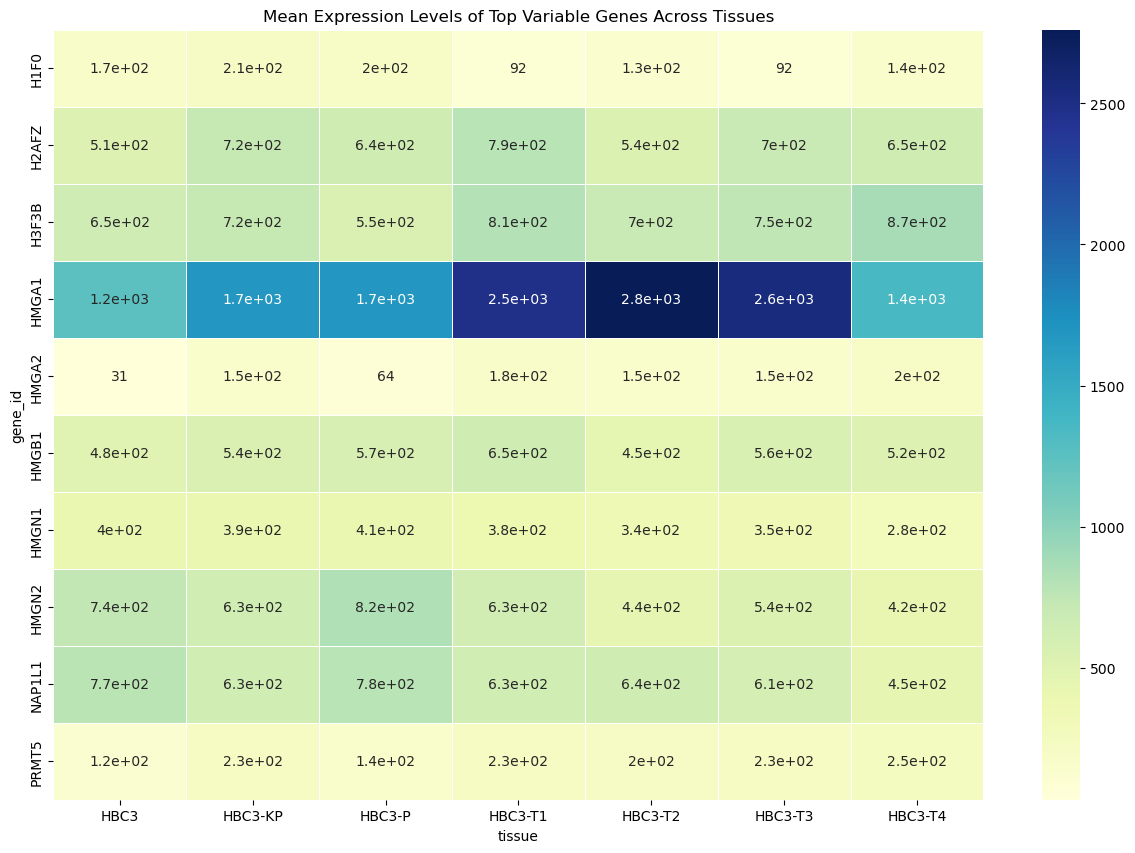

In [62]:
#Heatmap for top genes 
mean_expression = melted_filtered_data.groupby(['gene_id', 'tissue'])['expression'].mean().unstack()

# Generate the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(mean_expression, cmap="YlGnBu", annot=True, linewidths=.5)
plt.title('Mean Expression Levels of Top Variable Genes Across Tissues')
plt.show()

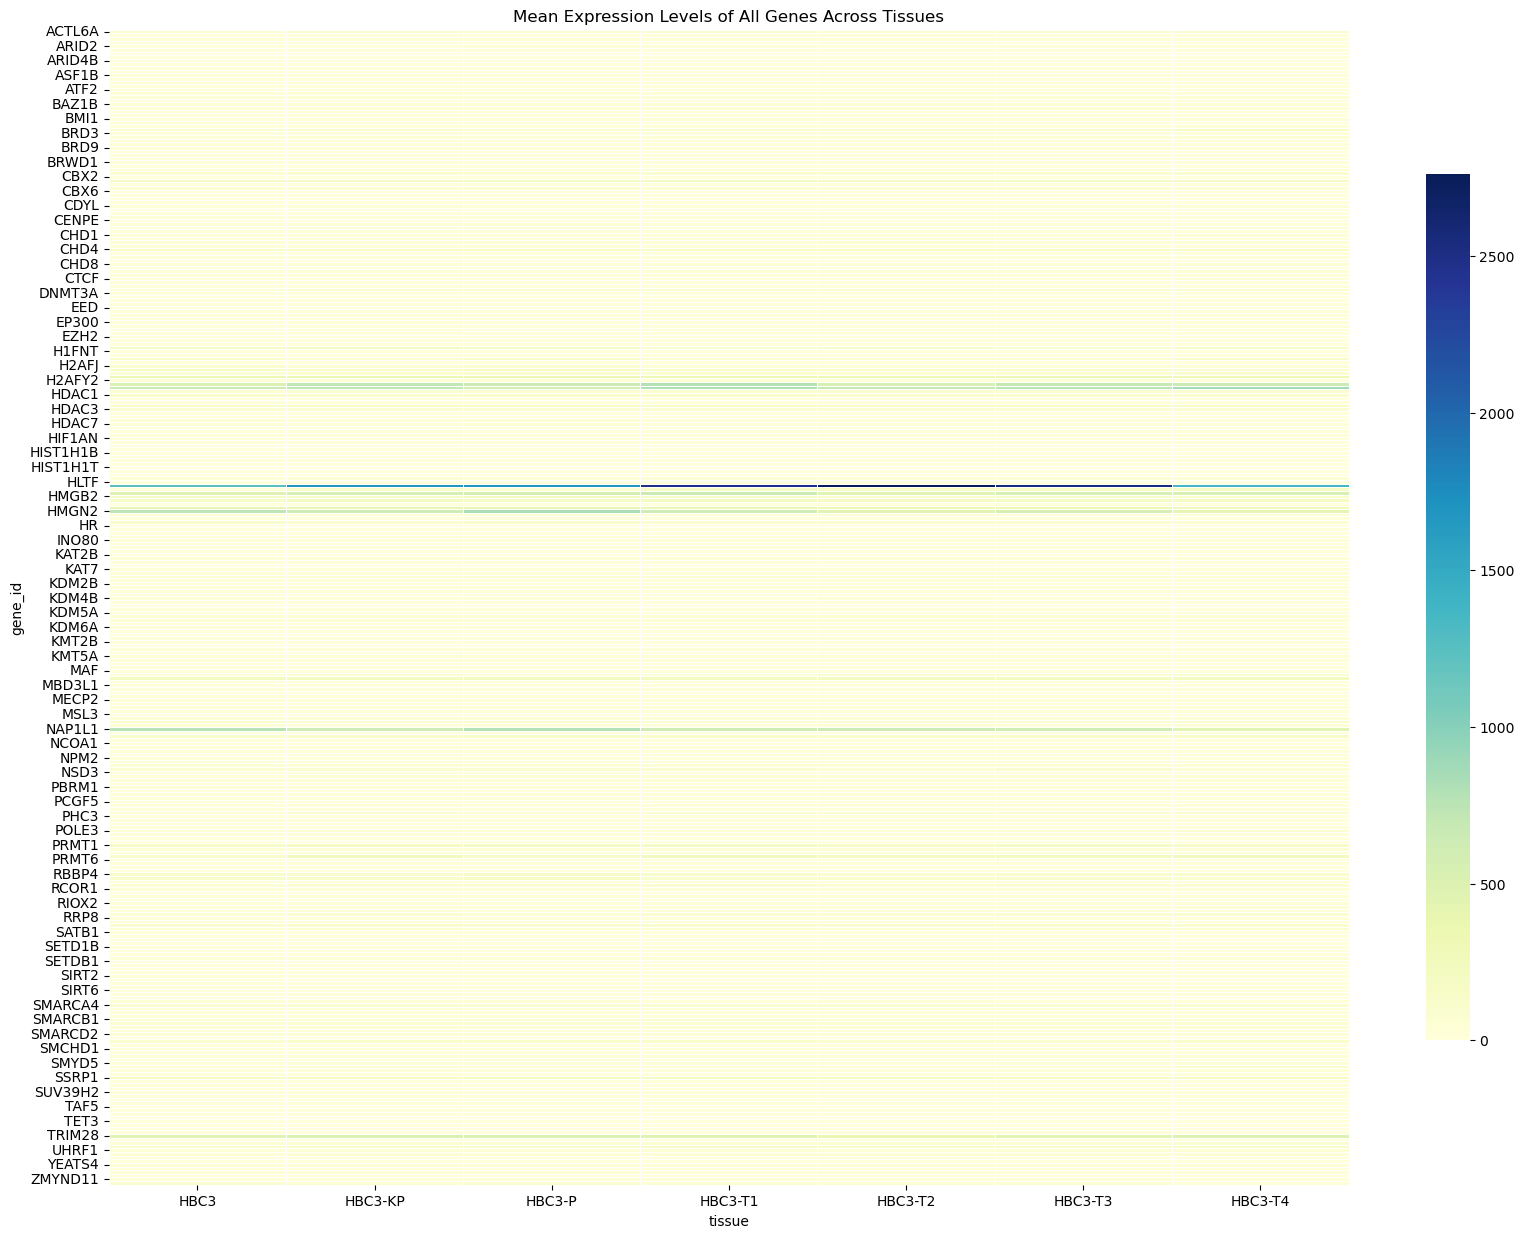

In [67]:
#Heatmap for all genes

mean_expression_all_genes = selected_melted_data.groupby(['gene_id', 'tissue'])['expression'].mean().unstack()

# Generate the heatmap
plt.figure(figsize=(20, 15))  # Adjust the size as needed
sns.heatmap(mean_expression_all_genes, cmap="YlGnBu", linewidths=.5, cbar_kws={"shrink": 0.75})
plt.title('Mean Expression Levels of All Genes Across Tissues')
plt.show()

In [69]:
#Anova test for all genes
anova_results = {}

for gene in selected_melted_data['gene_id'].unique():
    gene_data = selected_melted_data[selected_melted_data['gene_id'] == gene]
    
    # Fit the model
    model = ols('expression ~ C(tissue)', data=gene_data).fit()
    
    # Perform ANOVA on the model
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Store the p-value for the effect of tissue on expression for this gene
    anova_results[gene] = anova_table['PR(>F)']['C(tissue)']

# Convert the results to a DataFrame for better visualization
anova_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p_value'])
print(anova_df)







/Users/yunonapospelova/miniconda3/envs/ds/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/yunonapospelova/miniconda3/envs/ds/lib/python3.11/site-packages/statsmodels/base/model.py:1917: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/yunonapospelova/miniconda3/envs/ds/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Users/yunonapospelova/miniconda3/envs/ds/lib/python3.11/site-packages/statsmodels/base/model.py:1917: RuntimeWarning: invalid value encountered in divide
  F /= J
/Users/yunonapospelova/miniconda3/envs/ds/lib/python3.11/site-packages/statsmodels/base/model.py:1888: ValueWarning:

             p_value
KDM1A   3.489146e-07
MSL3    4.489203e-01
CREBBP  2.954269e-02
KMT2E   1.456378e-05
KDM7A   1.551513e-05
...              ...
KMT2B   5.777767e-03
H2AFB1  1.357059e-01
UHRF1   6.378812e-10
TADA2A  8.233745e-04
PCGF2   8.443276e-08

[318 rows x 1 columns]


I'll probably need to adjust these values by FDR, however I need to review statistics at first. I need more clear understanding with it 